# CNN VARIANT 1:Training From Scratch for Classification


## Step 1: Import Necessary Libraries

In [1]:
!pip install tensorflow-io[tensorflow]
import kagglehub
import os
import cv2
import imghdr
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_io as tfio
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

<ipython-input-1-2785001215>:5: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


## Step 2: Load and Inspect Dataset



In [2]:
florencetushabe_sickle_cell_disease_dataset_path = kagglehub.dataset_download('florencetushabe/sickle-cell-disease-dataset')
fenicxs_sickle_cell_anaemia_path = kagglehub.dataset_download('fenicxs/sickle-cell-anaemia')

100%|██████████| 253M/253M [00:01<00:00, 145MB/s]

Extracting files...


100%|██████████| 182M/182M [00:00<00:00, 230MB/s]

Extracting files...


In [3]:
NEG = "/content/drive/MyDrive/sickle cell images - negative"
POS = "/content/drive/MyDrive/sickle cell images - positive- unlabelled"
data_dir = fenicxs_sickle_cell_anaemia_path


In [27]:
os.listdir(os.path.join(data_dir))

['Negatives', 'Positives']

In [28]:
img = cv2.imread(os.path.join(data_dir, 'Negatives', 'N_1.jpg' ))

In [29]:
img.shape

(1015, 1000, 3)

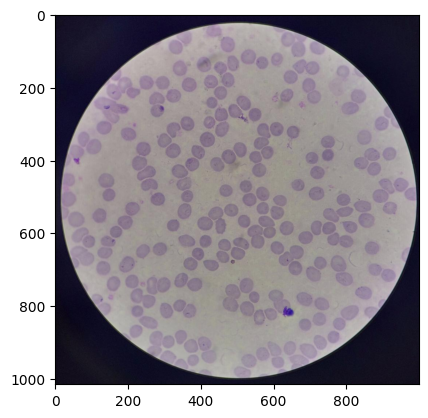

In [30]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [32]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 569 files belonging to 2 classes.


In [33]:
data_iterator = data.as_numpy_iterator()

In [34]:
batch = data_iterator.next()

In [35]:
batch[0].shape

(32, 256, 256, 3)

In [36]:
batch[1]

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1], dtype=int32)

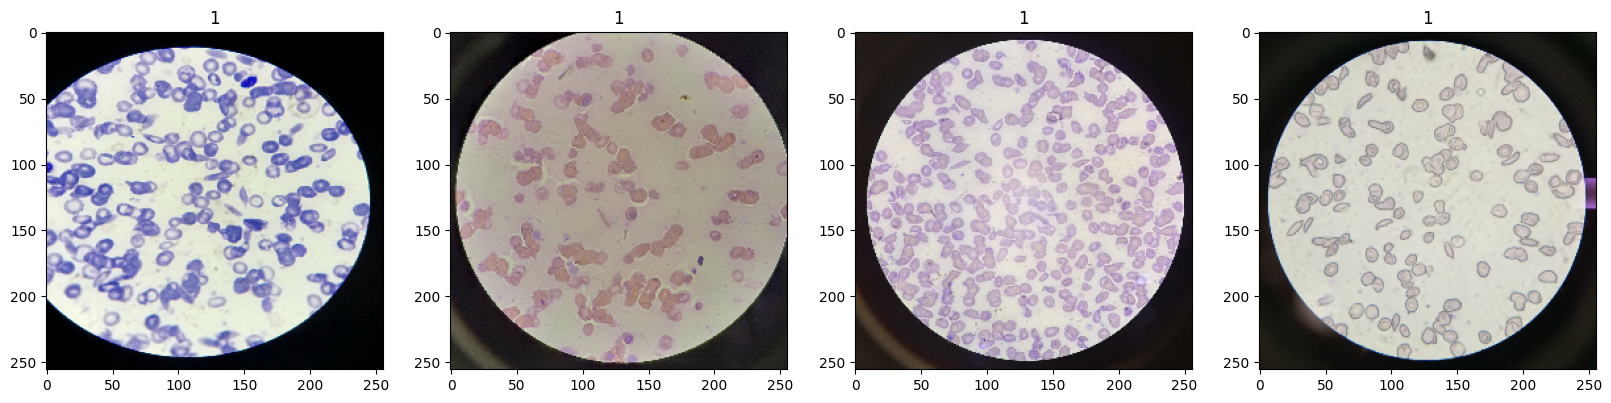

In [37]:
#0 is normal cell
#1 is sickel cell
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## Step 3: Data Preprocessing (Scaling, Splitting)


In [38]:
data = data.map(lambda x,y: (x/255, y))

In [39]:
data.as_numpy_iterator().next()

(array([[[[0.05098039, 0.04705882, 0.07843138],
          [0.05098039, 0.04705882, 0.07843138],
          [0.05490196, 0.05098039, 0.08235294],
          ...,
          [0.04313726, 0.03921569, 0.0627451 ],
          [0.04313726, 0.03921569, 0.0627451 ],
          [0.04313726, 0.03921569, 0.0627451 ]],
 
         [[0.05098039, 0.04705882, 0.07843138],
          [0.05098039, 0.04705882, 0.07843138],
          [0.05490196, 0.05098039, 0.08235294],
          ...,
          [0.04313726, 0.03921569, 0.0627451 ],
          [0.04313726, 0.03921569, 0.0627451 ],
          [0.04313726, 0.03921569, 0.0627451 ]],
 
         [[0.04705882, 0.04313726, 0.07450981],
          [0.05098039, 0.04705882, 0.07843138],
          [0.05490196, 0.05098039, 0.08235294],
          ...,
          [0.04705882, 0.04313726, 0.06666667],
          [0.04313726, 0.03921569, 0.0627451 ],
          [0.04313726, 0.03921569, 0.0627451 ]],
 
         ...,
 
         [[0.05490196, 0.07450981, 0.05882353],
          [0.05490

In [41]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [42]:
train_size + val_size + test_size

18

In [43]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [44]:
print(len(train))
print(len(val))
len(test)

12
4


2

## Step 4: Model Training and Evaluation



### Model Training

In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [75]:
model = Sequential()

In [76]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [77]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [78]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [80]:
hist = model.fit(train, epochs=20, validation_data=val)

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.6093 - loss: 0.6281 - val_accuracy: 0.7266 - val_loss: 0.5801
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 32s 3s/step - accuracy: 0.7193 - loss: 0.5984 - val_accuracy: 0.7344 - val_loss: 0.5737
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.7835 - loss: 0.5161 - val_accuracy: 0.7266 - val_loss: 0.5968
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.7518 - loss: 0.5704 - val_accuracy: 0.7734 - val_loss: 0.5241
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.7600 - loss: 0.5420 - val_accuracy: 0.6797 - val_loss: 0.6007
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.7865 - loss: 0.5295 - val_accuracy: 0.7109 - val_loss: 0.5421
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.7619 - loss: 0.4900 - val_accuracy: 0.7578 - val_loss: 0.5167
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.7767 - loss: 0.5112 - val_accuracy: 0.7188 - val_loss:

In [81]:
model.save('my_model1.keras')

## 4. Evaluation Metrics


###Loss

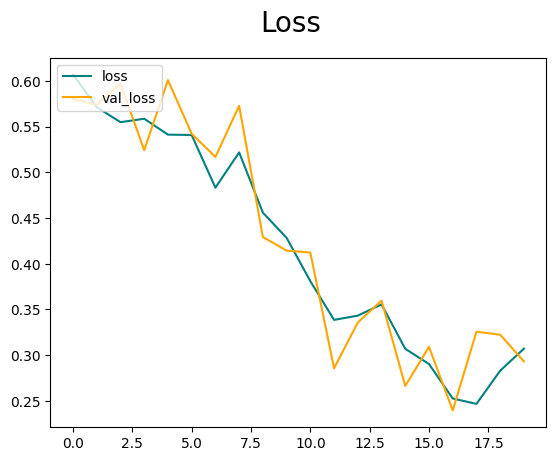

In [82]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

### Accuracy

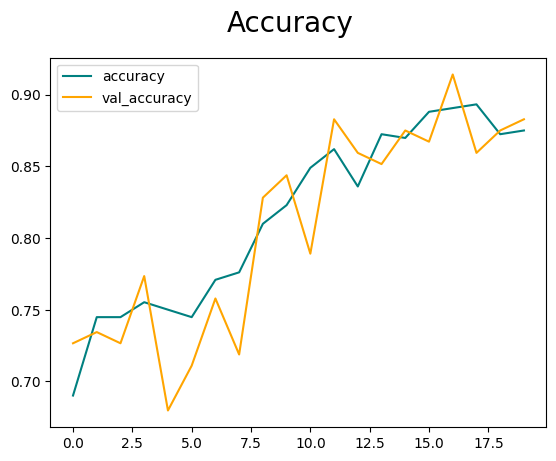

In [83]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

##Testing the Model

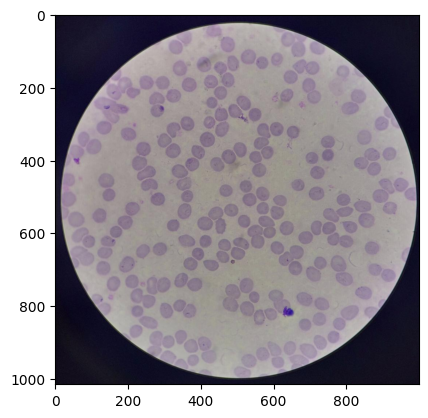

In [84]:
img = cv2.imread(os.path.join(fenicxs_sickle_cell_anaemia_path, 'Negatives', 'N_1.jpg'))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()


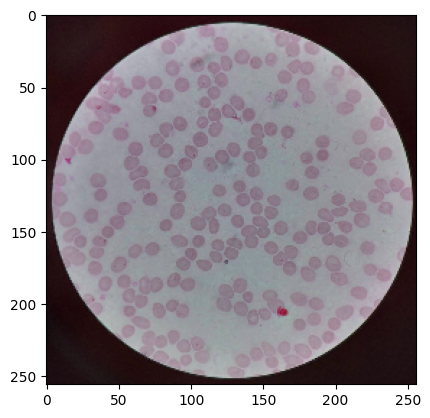

In [85]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [86]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


In [87]:
if yhat > 0.5:
    print(f'Predicted class is Sickle')
else:
    print(f'Predicted class is Not Sickle')

Predicted class is Sickle


#CNN VARIANT 2: PRETRAINED EFFICIENTNETB0 WITH CROSS VALIDATION

In [68]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0

# Config
dataset_path = '/content/drive/MyDrive/merged_sickle_cell_images_1'
img_size = (224, 224)
batch_size = 32
num_folds = 5

# 1. Get image paths and labels manually
image_paths = []
labels = []
class_names = ['healthy', 'sickle']

for label_index, class_name in enumerate(class_names):
    class_dir = os.path.join(dataset_path, class_name)
    for fname in os.listdir(class_dir):
        if fname.lower().endswith(('.jpg', '.png', '.jpeg')):
            image_paths.append(os.path.join(class_dir, fname))
            labels.append(label_index)

image_paths = np.array(image_paths)
labels = np.array(labels)

# 2. Prepare K-Fold splitter
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# 3. Cross-validation loop
for fold, (train_idx, val_idx) in enumerate(kf.split(image_paths)):
    print(f"\n📁 Fold {fold+1}/{num_folds}")

    train_paths, train_labels = image_paths[train_idx], labels[train_idx]
    val_paths, val_labels = image_paths[val_idx], labels[val_idx]

    # Create datasets using tf.data
    def preprocess(path, label):
        img = tf.io.read_file(path)
        # Use decode_image as it handles different formats
        img = tf.image.decode_image(img, channels=3)
        # Explicitly set the shape after decoding
        # The width and height are unknown at this stage, but the channel count is known
        img.set_shape([None, None, 3])
        img = tf.image.resize(img, img_size)
        img = tf.cast(img, tf.float32) / 255.0
        return img, label


    train_ds = tf.data.Dataset.from_tensor_slices((train_paths, train_labels)).map(preprocess).batch(batch_size).prefetch(tf.data.AUTOTUNE)
    val_ds = tf.data.Dataset.from_tensor_slices((val_paths, val_labels)).map(preprocess).batch(batch_size).prefetch(tf.data.AUTOTUNE)

    # Build model
    base_model = EfficientNetB0(include_top=False, input_shape=(224, 224, 3), weights='imagenet')
    base_model.trainable = False

    model = tf.keras.Sequential([
        layers.Input(shape=(224, 224, 3)),
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dropout(0.2),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train model
    model.fit(train_ds, validation_data=val_ds, epochs=10, verbose=1)

    # Evaluate
    y_true, y_pred_probs = [], []
    for images, labels_batch in val_ds:
        preds = model.predict(images)
        y_true.extend(labels_batch.numpy())
        y_pred_probs.extend(preds)

    y_pred = (np.array(y_pred_probs).flatten() > 0.5).astype(int)

    print("🧾 Classification Report:")
    print(classification_report(y_true, y_pred, target_names=class_names))


📁 Fold 1/5
Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 40s 4s/step - accuracy: 0.7459 - loss: 0.6440 - val_accuracy: 0.9143 - val_loss: 0.4459
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - accuracy: 0.9235 - loss: 0.4455 - val_accuracy: 0.9143 - val_loss: 0.3894
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.9235 - loss: 0.3895 - val_accuracy: 0.9143 - val_loss: 0.3729
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 24s 5s/step - accuracy: 0.9235 - loss: 0.3697 - val_accuracy: 0.9143 - val_loss: 0.3717
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 32s 3s/step - accuracy: 0.9235 - loss: 0.3666 - val_accuracy: 0.9143 - val_loss: 0.3778
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.9235 - loss: 0.3812 - val_accuracy: 0.9143 - val_loss: 0.3870
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - accuracy: 0.9235 - loss: 0.3826 - val_accuracy: 0.9143 - val_loss: 0.3980
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.9235 - loss: 0.3936 - val_accuracy: 0.9143 - val_loss: 0.4

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 35s 4s/step - accuracy: 0.8817 - loss: 0.5868 - val_accuracy: 0.8286 - val_loss: 0.4886
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 36s 3s/step - accuracy: 0.9346 - loss: 0.3919 - val_accuracy: 0.8286 - val_loss: 0.4694
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 22s 4s/step - accuracy: 0.9346 - loss: 0.3581 - val_accuracy: 0.8286 - val_loss: 0.4657
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.9346 - loss: 0.3430 - val_accuracy: 0.8286 - val_loss: 0.4662
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.9346 - loss: 0.3520 - val_accuracy: 0.8286 - val_loss: 0.4687
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.9346 - loss: 0.3540 - val_accuracy: 0.8286 - val_loss: 0.4721
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - accuracy: 0.9346 - loss: 0.3554 - val_accuracy: 0.8286 - val_loss: 0.4754
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.9346 - loss: 0.3656 - val_accuracy: 0.8286 - val_loss: 0.4779
Epoch 9/

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
🧾 Classification Report:
              precision    recall  f1-score   support

     healthy       0.83      1.00      0.91        29
      sickle       0.00      0.00      0.00         6

    accuracy                           0.83        35
   macro avg       0.41      0.50      0.45        35
weighted avg       0.69      0.83      0.75        35


📁 Fold 3/5


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 36s 4s/step - accuracy: 0.9045 - loss: 0.5630 - val_accuracy: 0.8571 - val_loss: 0.4565
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 0.9309 - loss: 0.3904 - val_accuracy: 0.8571 - val_loss: 0.4339
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.9309 - loss: 0.3562 - val_accuracy: 0.8571 - val_loss: 0.4298
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.9309 - loss: 0.3475 - val_accuracy: 0.8571 - val_loss: 0.4313
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.9309 - loss: 0.3486 - val_accuracy: 0.8571 - val_loss: 0.4362
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 21s 4s/step - accuracy: 0.9309 - loss: 0.3621 - val_accuracy: 0.8571 - val_loss: 0.4423
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.9309 - loss: 0.3673 - val_accuracy: 0.8571 - val_loss: 0.4488
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - accuracy: 0.9309 - loss: 0.3744 - val_accuracy: 0.8571 - val_loss: 0.4544
Epoch 9/

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 33s 4s/step - accuracy: 0.3909 - loss: 0.7215 - val_accuracy: 0.8000 - val_loss: 0.5555
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - accuracy: 0.9383 - loss: 0.4726 - val_accuracy: 0.8000 - val_loss: 0.5117
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.9383 - loss: 0.3731 - val_accuracy: 0.8000 - val_loss: 0.5024
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.9383 - loss: 0.3287 - val_accuracy: 0.8000 - val_loss: 0.5009
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 0.9383 - loss: 0.3231 - val_accuracy: 0.8000 - val_loss: 0.5009
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.9383 - loss: 0.3283 - val_accuracy: 0.8000 - val_loss: 0.5017
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.9383 - loss: 0.3316 - val_accuracy: 0.8000 - val_loss: 0.5033
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - accuracy: 0.9383 - loss: 0.3468 - val_accuracy: 0.8000 - val_loss: 0.5054
Epoch 9/

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 37s 4s/step - accuracy: 0.9383 - loss: 0.4790 - val_accuracy: 0.8000 - val_loss: 0.5022
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 37s 4s/step - accuracy: 0.9383 - loss: 0.3381 - val_accuracy: 0.8000 - val_loss: 0.5004
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.9383 - loss: 0.3157 - val_accuracy: 0.8000 - val_loss: 0.5006
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.9383 - loss: 0.3172 - val_accuracy: 0.8000 - val_loss: 0.5016
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 22s 4s/step - accuracy: 0.9383 - loss: 0.3317 - val_accuracy: 0.8000 - val_loss: 0.5036
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.9383 - loss: 0.3460 - val_accuracy: 0.8000 - val_loss: 0.5062
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 22s 4s/step - accuracy: 0.9383 - loss: 0.3571 - val_accuracy: 0.8000 - val_loss: 0.5088
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.9383 - loss: 0.3655 - val_accuracy: 0.8000 - val_loss: 0.5104
Epoch 9/

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#CNN VARIANT 3: PRETRAINED EFFICIENTNETB0 WITH DATA AUGMENTATION

Found 569 files belonging to 2 classes.
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 8, 8, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,377,764 (16.70 MB)

 Trainable params: 328,193 (1.25 MB)

 Non-trainable params: 4,049,571 (15.45 MB)

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 106s 7s/step - accuracy: 0.4718 - loss: 0.7294 - val_accuracy: 0.7344 - val_loss: 0.6431
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 93s 8s/step - accuracy: 0.6218 - loss: 0.7321 - val_accuracy: 0.1875 - val_loss: 0.7051
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 84s 7s/step - accuracy: 0.5221 - loss: 0.7180 - val_accuracy: 0.2188 - val_loss: 0.7530
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 159s 8s/step - accuracy: 0.4144 - loss: 0.7350 - val_accuracy: 0.7109 - val_loss: 0.6550
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 88s 7s/step - accuracy: 0.4786 - loss: 0.7241 - val_accuracy: 0.2656 - val_loss: 0.7305
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 85s 7s/step - accuracy: 0.3581 - loss: 0.7187 - val_accuracy: 0.2188 - val_loss: 0.7330
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 140s 7s/step - accuracy: 0.5578 - loss: 0.6803 - val_accuracy: 0.7656 - val_loss: 0.6434
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 95s 8s/step - accuracy: 0.5274 - loss: 0.7515 - val_accuracy: 0.2891 - val_lo

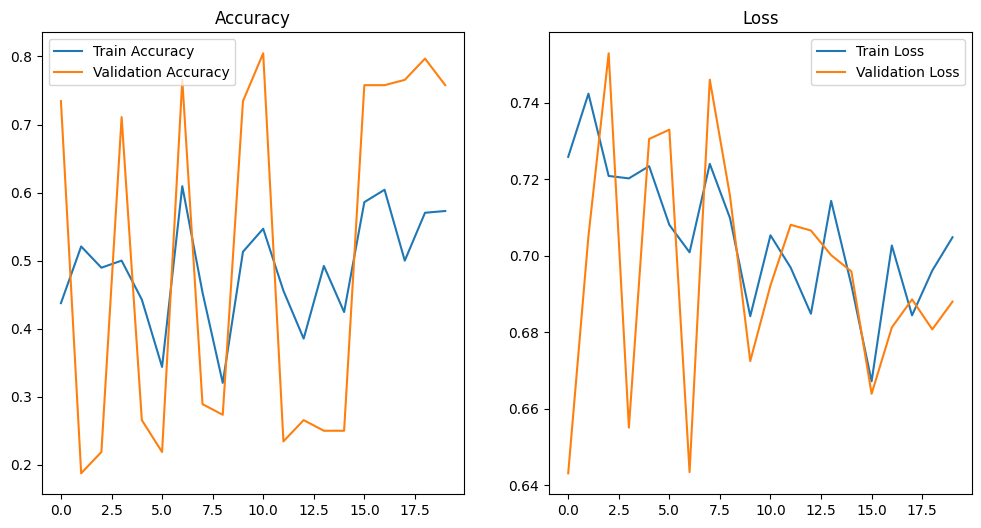

2/2 ━━━━━━━━━━━━━━━━━━━━ 32s 5s/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.75      1.00      0.86        43

    accuracy                           0.75        57
   macro avg       0.38      0.50      0.43        57
weighted avg       0.57      0.75      0.65        57

ROC AUC: 0.42192691029900337
Confusion Matrix:
[[ 0 14]
 [ 0 43]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ValueError: Attempt to convert a value (None) with an unsupported type (<class 'NoneType'>) to a Tensor.

In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from matplotlib import pyplot as plt



# dataset
batch_size = 32
image_size = (256, 256)
data_dir = fenicxs_sickle_cell_anaemia_path

data = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    image_size=image_size,
    batch_size=batch_size
)

# Data Augmentation
augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2)
])

data = data.map(lambda x, y: (augmentation(x) / 255.0, y))

# Splitting the data
train_size = int(len(data) * 0.7)
val_size = int(len(data) * 0.2) + 1
test_size = int(len(data) * 0.1) + 1

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

# class weights
all_labels = np.concatenate([label.numpy() for _, label in data])
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(all_labels),
    y=all_labels
)
class_weights = {i: class_weights[i] for i in range(len(class_weights))}

# pretrained  EfficientNet
base_model = tf.keras.applications.EfficientNetB0(
    include_top=False,
    input_shape=(256, 256, 3),
    weights="imagenet"
)
base_model.trainable = False

# Fine-tune the model
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

# Model Summary
model.summary()

# Train the model
history = model.fit(
    train,
    epochs=20,
    validation_data=val,
    class_weight=class_weights
)

# Plot training and validation performance
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

# Evaluate the model on the test set
y_true = np.concatenate([label.numpy() for _, label in test])
y_pred_probs = model.predict(test)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

# Calculate metrics
print(classification_report(y_true, y_pred))
roc_auc = roc_auc_score(y_true, y_pred_probs)
print(f"ROC AUC: {roc_auc}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Visualize a test prediction
img = cv2.imread('/kaggle/input/test-sickel-cell/test image.jpg')
resize = tf.image.resize(img, image_size)
prediction = model.predict(np.expand_dims(resize / 255.0, axis=0))

plt.imshow(resize.numpy().astype(int))
plt.title(f"Prediction: {'Sickle' if prediction > 0.5 else 'Not Sickle'}")
plt.show()


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#CNN VARIANT 4: DENSENET21

In [4]:
import os
import albumentations as A
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.metrics import precision_score, recall_score, f1_score, average_precision_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split, StratifiedKFold
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE


np.random.seed(42)
tf.random.set_seed(42)


In [7]:
def load_and_preprocess_images(data_dir, target_size=(224, 224)):
    images = []
    labels = []
    classes = os.listdir(data_dir)
    for label, class_name in enumerate(classes):
        class_path = os.path.join(data_dir, class_name)
        if os.path.isdir(class_path):
            for img_name in os.listdir(class_path):
                img_path = os.path.join(class_path, img_name)
                img = cv2.imread(img_path)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, target_size)
                img = img / 255.0
                images.append(img)
                labels.append(label)
    return np.array(images), np.array(labels)


data_dir = fenicxs_sickle_cell_anaemia_path
X, y = load_and_preprocess_images(data_dir)


In [8]:
def load_and_preprocess_images(data_dir, target_size=(224, 224)):
    images = []
    labels = []
    # Check if the directory exists before listing
    if not os.path.isdir(data_dir):
        print(f"Error: Directory not found: {data_dir}")
        return np.array(images), np.array(labels)

    classes = os.listdir(data_dir)
    for label, class_name in enumerate(classes):
        class_path = os.path.join(data_dir, class_name)
        if os.path.isdir(class_path):
            for img_name in os.listdir(class_path):
                img_path = os.path.join(class_path, img_name)
                # Add a check to ensure the entry is a file
                if os.path.isfile(img_path):
                    img = cv2.imread(img_path)
                    if img is not None: # Check if image was read successfully
                        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                        img = cv2.resize(img, target_size)
                        img = img / 255.0
                        images.append(img)
                        labels.append(label)
    return np.array(images), np.array(labels)

# Use the variable containing the downloaded path from kagglehub
# Ensure 'fenicxs_sickle_cell_anaemia_path' is defined and correct in the current environment
data_dir = fenicxs_sickle_cell_anaemia_path
X, y = load_and_preprocess_images(data_dir)

In [9]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)


In [10]:

X_train_flat = X_train.reshape(X_train.shape[0], -1)
undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train_flat, y_train)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_under, y_train_under)
X_train_resampled = X_train_resampled.reshape(-1, 224, 224, 3)


In [11]:
augmentation_pipeline = A.Compose([
    A.Rotate(limit=15, p=0.7),
    A.RandomBrightnessContrast(p=0.5),
    A.GaussianBlur(p=0.3),
    A.GridDistortion(p=0.3),
    A.CLAHE(p=0.2),
    A.RandomScale(scale_limit=0.1, p=0.5),
    A.Perspective(p=0.3)
])

def augment_images(images, labels, augmentation_pipeline, augmentation_factor=3):
    augmented_images = []
    augmented_labels = []
    for img, label in zip(images, labels):
        augmented_images.append(img)
        augmented_labels.append(label)
        for _ in range(augmentation_factor):
            img_bgr = cv2.cvtColor((img * 255).astype(np.uint8), cv2.COLOR_RGB2BGR)
            augmented = augmentation_pipeline(image=img_bgr)['image']
            augmented_rgb = cv2.cvtColor(augmented, cv2.COLOR_BGR2RGB) / 255.0
            if augmented_rgb.shape == (224, 224, 3):
                augmented_images.append(augmented_rgb)
                augmented_labels.append(label)
    return np.array(augmented_images), np.array(augmented_labels)

X_train_aug, y_train_aug = augment_images(X_train_resampled, y_train_resampled, augmentation_pipeline)


In [12]:
def create_model():
    base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    for layer in base_model.layers[:-150]:
        layer.trainable = False
    model = tf.keras.Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(1024, activation='relu', kernel_regularizer=l2(0.002)),
        BatchNormalization(),
        Dropout(0.5),
        Dense(512, activation='relu', kernel_regularizer=l2(0.003)),
        BatchNormalization(),
        Dropout(0.4),
        Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    return model


In [13]:

batch_size = 32
epochs = 8
k_folds = 5
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)


fold_metrics = []

for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_aug, y_train_aug)):
    print(f" Fold {fold + 1}/{k_folds}")


    X_train_fold, X_val_fold = X_train_aug[train_idx], X_train_aug[val_idx]
    y_train_fold, y_val_fold = y_train_aug[train_idx], y_train_aug[val_idx]


    model = create_model()
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                  loss=BinaryCrossentropy(),
                  metrics=['accuracy'])


    history = model.fit(
        X_train_fold, y_train_fold,
        validation_data=(X_val_fold, y_val_fold),
        batch_size=batch_size,
        epochs=epochs,
        verbose=1
    )


    val_loss, val_accuracy = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    print(f"Fold {fold + 1}: Loss = {val_loss:.4f}, Accuracy = {val_accuracy:.4f}")


    fold_metrics.append({
        'fold': fold + 1,
        'val_loss': val_loss,
        'val_accuracy': val_accuracy
    })


 Fold 1/5
29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/8
14/14 ━━━━━━━━━━━━━━━━━━━━ 123s 6s/step - accuracy: 0.5324 - loss: 5.3481 - val_accuracy: 0.5047 - val_loss: 5.0657
Epoch 2/8
14/14 ━━━━━━━━━━━━━━━━━━━━ 140s 6s/step - accuracy: 0.7896 - loss: 4.8122 - val_accuracy: 0.5514 - val_loss: 4.9322
Epoch 3/8
14/14 ━━━━━━━━━━━━━━━━━━━━ 142s 6s/step - accuracy: 0.8723 - loss: 4.6283 - val_accuracy: 0.6636 - val_loss: 4.8150
Epoch 4/8
14/14 ━━━━━━━━━━━━━━━━━━━━ 155s 7s/step - accuracy: 0.8876 - loss: 4.4790 - val_accuracy: 0.7196 - val_loss: 4.7125
Epoch 5/8
14/14 ━━━━━━━━━━━━━━━━━━━━ 135s 7s/step - accuracy: 0.9125 - loss: 4.3577 - val_accuracy: 0.7570 - val_loss: 4.6125
Epoch 6/8
14/14 ━━━━━━━━━━━━━━━━━━━━ 136s 6s/step - accuracy: 0.9204 - loss: 4.2851 - val_accuracy: 0.7944 - val_loss: 4.5134
Epoch 7/8
14/14 ━━━━━━━━━━━━━━━━━━━━ 81s 6s/step - accuracy: 0.9496 - loss: 4.1808 - val_accuracy: 0.8411 - val_loss: 4.4069
Epoch 8/8
14/14 ━━━━━━━━━━━━━━━━━━━━ 89s 6s/step - accurac

In [14]:

y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)


precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)
average_precision = average_precision_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred_classes)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Average Precision: {average_precision:.4f}")
print("Confusion Matrix:")
print(conf_matrix)



3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 5s/step
Precision: 1.0000
Recall: 0.5156
F1 Score: 0.6804
Average Precision: 0.9927
Confusion Matrix:
[[22  0]
 [31 33]]


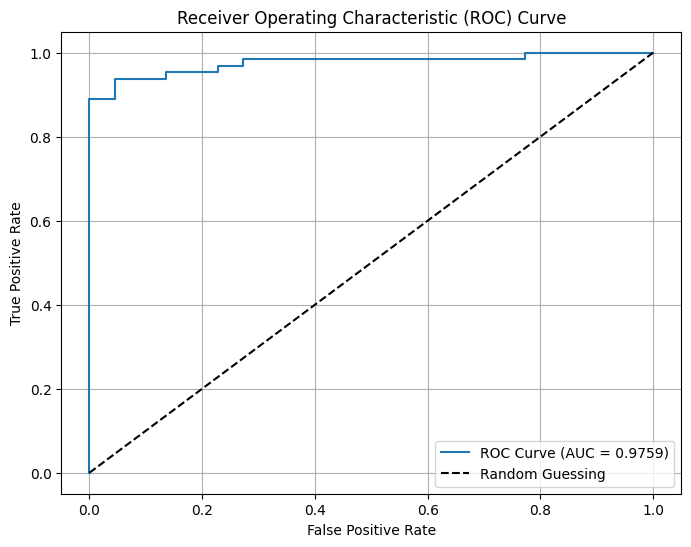

In [15]:

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.grid()
plt.show()


In [16]:

model.save("sickle_cell_model.h5")


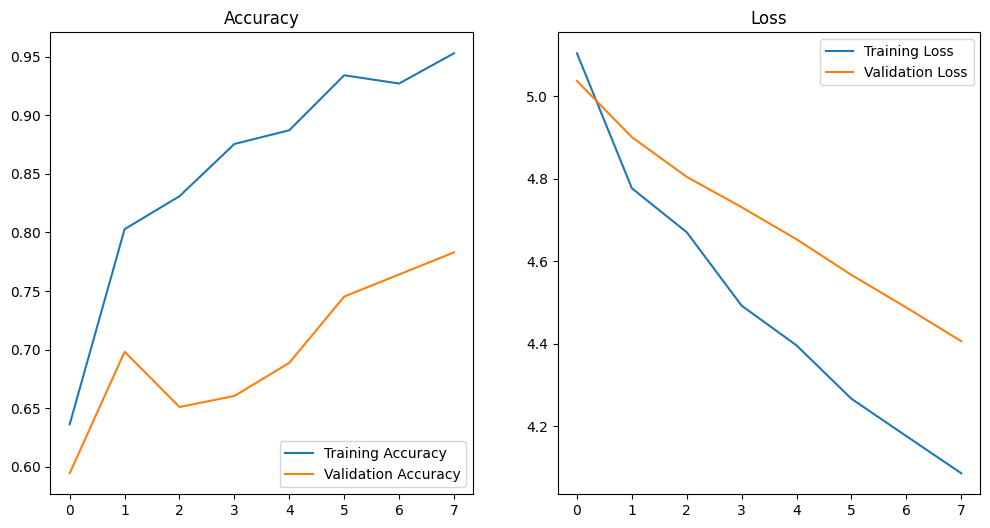

In [17]:

def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 6))


    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Accuracy')


    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Loss')

    plt.show()


plot_training_history(history)
